In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import sklearn
import tensorflow as tf

In [13]:
from tensorflow import keras

In [18]:
games = pd.read_csv('games16.csv')

In [23]:
games['cover'] = games['pts'] - games['a_pts'] - games['spread']

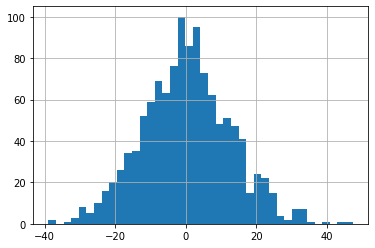

In [27]:
games['cover'].hist(bins = 40)

In [28]:
games.columns

Index(['game_id', 'game_date', 'matchup', 'team_id', 'is_home', 'wl', 'w', 'l',
       'w_pct', 'min', 'fgm', 'fga', 'fg_pct', 'fg3m', 'fg3a', 'fg3_pct',
       'ftm', 'fta', 'ft_pct', 'oreb', 'dreb', 'reb', 'ast', 'stl', 'blk',
       'tov', 'pf', 'pts', 'a_team_id', 'season_year', 'season_type', 'season',
       'num_game', 'a_fgm', 'a_fga', 'a_fg_pct', 'a_fg3m', 'a_fg3a',
       'a_fg3_pct', 'a_ftm', 'a_fta', 'a_ft_pct', 'a_oreb', 'a_dreb', 'a_reb',
       'a_ast', 'a_stl', 'a_blk', 'a_tov', 'a_pf', 'a_pts', 'a_num_game',
       'spread', 'cover'],
      dtype='object')

In [113]:
important_features = ['fg_pct', 'fg3_pct',
       'fta', 'ft_pct', 'reb', 'ast', 'stl', 'blk',
       'tov', 'pf', 'a_fg_pct',
       'a_fg3_pct', 'a_ft_pct',
       'a_ast', 'a_stl', 'a_blk', 'a_tov', 'a_pf']
points = ['pts', 'a_pts']

In [32]:
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [122]:
X= games[important_features]
y = games[points]

In [117]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [203]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(2))

model.compile(optimizer='adam',loss='mse')

In [204]:
(games['pts'] - games['a_pts']).describe()

count    1182.000000
mean        3.225042
std        13.688198
min       -37.000000
25%        -6.000000
50%         4.000000
75%        12.000000
max        49.000000
dtype: float64

In [205]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=300)

Train on 945 samples, validate on 237 samples
Epoch 1/300
945/945 [==============================] - 0s 256us/sample - loss: 11230.4796 - val_loss: 11063.9961
Epoch 2/300
945/945 [==============================] - 0s 22us/sample - loss: 11147.0238 - val_loss: 10957.9345
Epoch 3/300
945/945 [==============================] - 0s 25us/sample - loss: 11020.8040 - val_loss: 10799.6345
Epoch 4/300
945/945 [==============================] - 0s 26us/sample - loss: 10832.7286 - val_loss: 10563.4372
Epoch 5/300
945/945 [==============================] - 0s 25us/sample - loss: 10550.6485 - val_loss: 10206.9548
Epoch 6/300
945/945 [==============================] - 0s 27us/sample - loss: 10122.1394 - val_loss: 9665.7279
Epoch 7/300
945/945 [==============================] - 0s 24us/sample - loss: 9484.0741 - val_loss: 8879.6402
Epoch 8/300
945/945 [==============================] - 0s 27us/sample - loss: 8573.0013 - val_loss: 7788.0557
Epoch 9/300
945/945 [==============================] - 0s 27us

945/945 [==============================] - 0s 23us/sample - loss: 88.9549 - val_loss: 82.7188
Epoch 77/300
945/945 [==============================] - 0s 21us/sample - loss: 88.1263 - val_loss: 82.0591
Epoch 78/300
945/945 [==============================] - 0s 31us/sample - loss: 87.4185 - val_loss: 81.3816
Epoch 79/300
945/945 [==============================] - 0s 21us/sample - loss: 86.6643 - val_loss: 80.7904
Epoch 80/300
945/945 [==============================] - 0s 18us/sample - loss: 85.9542 - val_loss: 80.2139
Epoch 81/300
945/945 [==============================] - 0s 21us/sample - loss: 85.3306 - val_loss: 79.6572
Epoch 82/300
945/945 [==============================] - 0s 21us/sample - loss: 84.7254 - val_loss: 79.1123
Epoch 83/300
945/945 [==============================] - 0s 19us/sample - loss: 84.0280 - val_loss: 78.6697
Epoch 84/300
945/945 [==============================] - 0s 19us/sample - loss: 83.4841 - val_loss: 78.1901
Epoch 85/300
945/945 [============================

945/945 [==============================] - 0s 23us/sample - loss: 72.9477 - val_loss: 70.9707
Epoch 153/300
945/945 [==============================] - 0s 24us/sample - loss: 72.8987 - val_loss: 70.9204
Epoch 154/300
945/945 [==============================] - 0s 25us/sample - loss: 72.8657 - val_loss: 70.9348
Epoch 155/300
945/945 [==============================] - 0s 23us/sample - loss: 72.7763 - val_loss: 70.9046
Epoch 156/300
945/945 [==============================] - 0s 25us/sample - loss: 72.7134 - val_loss: 70.9397
Epoch 157/300
945/945 [==============================] - 0s 25us/sample - loss: 72.6708 - val_loss: 70.8286
Epoch 158/300
945/945 [==============================] - 0s 25us/sample - loss: 72.6618 - val_loss: 70.7491
Epoch 159/300
945/945 [==============================] - 0s 23us/sample - loss: 72.5821 - val_loss: 70.7933
Epoch 160/300
945/945 [==============================] - 0s 21us/sample - loss: 72.4827 - val_loss: 70.6726
Epoch 161/300
945/945 [===================

Epoch 228/300
945/945 [==============================] - 0s 27us/sample - loss: 68.3882 - val_loss: 67.9552
Epoch 229/300
945/945 [==============================] - 0s 24us/sample - loss: 68.4320 - val_loss: 67.9366
Epoch 230/300
945/945 [==============================] - 0s 23us/sample - loss: 68.2205 - val_loss: 67.8091
Epoch 231/300
945/945 [==============================] - 0s 22us/sample - loss: 68.1088 - val_loss: 67.7558
Epoch 232/300
945/945 [==============================] - 0s 22us/sample - loss: 68.2204 - val_loss: 67.6634
Epoch 233/300
945/945 [==============================] - 0s 26us/sample - loss: 68.1280 - val_loss: 67.7771
Epoch 234/300
945/945 [==============================] - 0s 24us/sample - loss: 67.8595 - val_loss: 67.5063
Epoch 235/300
945/945 [==============================] - 0s 24us/sample - loss: 67.6098 - val_loss: 67.5844
Epoch 236/300
945/945 [==============================] - 0s 25us/sample - loss: 67.4613 - val_loss: 67.2644
Epoch 237/300
945/945 [=====

In [206]:
arr = model.predict(X_test)

In [207]:
pred_score = pd.DataFrame(arr)

In [208]:
pred_diff = pred_score[0] - pred_score[1]

In [209]:
pred_diff.describe()

count    237.000000
mean       3.784723
std        8.020269
min      -15.549965
25%       -1.388847
50%        3.456261
75%        8.698738
max       28.127937
dtype: float64

In [216]:
resids = (pred_diff - games['pts'] + games['a_pts'])
resids.describe()

count    237.000000
mean       0.168691
std       16.513614
min      -35.263779
25%       -9.964478
50%        0.073380
75%       10.097237
max       51.170113
dtype: float64

In [225]:
from sklearn.metrics import mean_squared_error

In [227]:
mean_squared_error(y_test, pred_score)

43.98454286151994

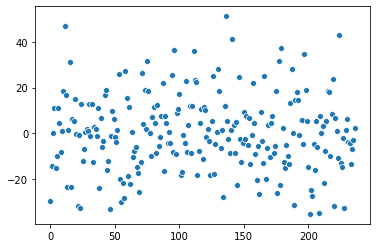

In [215]:
sns.scatterplot(data = pred_diff - games['pts'] + games['a_pts'])

C:\Users\Anthony\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Anthony\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Anthony\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


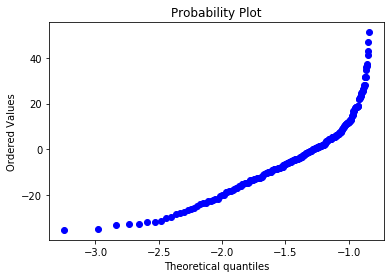

In [217]:
import pylab 
import scipy.stats as stats

stats.probplot(resids, dist="norm", plot=pylab)
pylab.show()

In [285]:
to_drop = ['w', 'l', 'w_pct', 'is_home', 'min']

In [286]:
def create_team_table(team):
    table = games[(games['team_id'] ==  team )| (games['a_team_id'] == team) ]
    table['home'] = (games['team_id'] == team)
    table = table.sort_values(by = 'num_game')
    table.drop(to_drop, axis = 1, inplace = True)
    return table

In [287]:
dic = {}
for team in games['team_id'].unique():
    dic[team] = create_team_table(team)

1610612742
1610612757
1610612747
1610612746
1610612744
1610612764
1610612765
1610612759
1610612740
1610612753
1610612745
1610612761
1610612751
1610612766
1610612743
1610612737
1610612750
1610612763
1610612739
1610612755
1610612738
1610612749
1610612752
1610612741
1610612760
1610612758
1610612756


C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1610612748
1610612754
1610612762


### IMPORTANT
$n$ value for number of games history is set here!

In [273]:
n = 10

formulas:

possesions = FGA + 0.5 x FTA - ORB + TO

ORT = pts/100 possesions
DRT = a_pts/100 poss
3PAr = 3pa / fga
TOV% = turnover rate
DTOV% = defensive turnover rate

In [297]:
table = dic[1610612748]
table['poss'] = table['fga'] + 0.5*table['fta'] - table['oreb'] + table['tov']
table['a_poss'] = table['a_fga'] + 0.5*table['fta'] - table['oreb'] + table['tov']

In [309]:
roll = table.rolling(window = n).sum()
roll = roll.shift()

,game_id,team_id,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,...,a_stl,a_blk,a_tov,a_pf,a_pts,a_num_game,spread,cover,home,poss
876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,216010949.0,1.610613e+10,386.0,850.0,4.551,84.0,267.0,3.148,169.0,222.0,...,72.0,54.0,128.0,196.0,1054.0,732.0,43.25,-72.25,6.0,973.0
125,216011116.0,1.610613e+10,375.0,846.0,4.444,84.0,263.0,3.204,171.0,225.0,...,79.0,55.0,130.0,194.0,1055.0,744.0,42.75,-92.75,5.0,972.5
537,216011255.0,1.610613e+10,369.0,843.0,4.390,84.0,253.0,3.354,175.0,229.0,...,85.0,54.0,138.0,195.0,1034.0,754.0,41.50,-78.50,4.0,978.5
462,216011407.0,1.610613e+10,371.0,842.0,4.415,85.0,259.0,3.311,182.0,240.0,...,87.0,53.0,135.0,197.0,1058.0,764.0,40.75,-89.75,4.0,990.0


In [316]:
roll['fg3_pct'] = roll['fg3m']/roll['fg3a']
roll['a_fg3_pct'] = roll['a_fg3m']/roll['a_fg3a']
roll['fg_pct'] = roll['fgm']/roll['fga']
roll['a_fg_pct'] = roll['a_fgm']/roll['a_fga']
roll['ft_pct'] = roll['ftm']/roll['fta']
roll['a_ft_pct'] = roll['a_ftm']/roll['a_fta']

In [317]:
roll['ORT'] = 
roll['DRT']

,game_id,team_id,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,...,a_stl,a_blk,a_tov,a_pf,a_pts,a_num_game,spread,cover,home,poss
876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,216010621.0,1.610613e+10,388.0,844.0,0.459716,90.0,278.0,0.323741,171.0,229.0,...,73.0,51.0,139.0,199.0,1027.0,712.0,49.00,-39.00,7.0,977.5
125,216010791.0,1.610613e+10,395.0,859.0,0.459837,92.0,277.0,0.332130,164.0,217.0,...,76.0,52.0,135.0,193.0,1054.0,722.0,46.75,-54.75,7.0,980.5
537,216010949.0,1.610613e+10,386.0,850.0,0.454118,84.0,267.0,0.314607,169.0,222.0,...,72.0,54.0,128.0,196.0,1054.0,732.0,43.25,-72.25,6.0,973.0
462,216011116.0,1.610613e+10,375.0,846.0,0.443262,84.0,263.0,0.319392,171.0,225.0,...,79.0,55.0,130.0,194.0,1055.0,744.0,42.75,-92.75,5.0,972.5


In [318]:
games

,game_id,game_date,matchup,team_id,is_home,wl,w,l,w_pct,min,...,a_reb,a_ast,a_stl,a_blk,a_tov,a_pf,a_pts,a_num_game,spread,cover
0,21600662,2017-01-22,LAL @ DAL,1610612742,t,W,15,29,0.341,240,...,32,11,3,4,17,20,73,48,6.00,43.00
1,21600728,2017-01-31,CHA @ POR,1610612757,t,W,22,28,0.440,240,...,42,20,3,6,9,13,98,49,3.75,13.25
2,21601183,2017-04-07,SAS @ DAL,1610612742,t,L,32,47,0.405,240,...,58,26,6,5,6,11,102,79,4.75,-17.75
3,21600475,2016-12-27,UTA @ LAL,1610612747,t,L,12,23,0.343,240,...,39,19,6,4,19,18,102,32,-5.75,3.75
4,21601194,2017-04-08,UTA @ POR,1610612757,t,W,40,40,0.500,240,...,47,19,2,9,10,18,86,80,2.50,12.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,21600528,2017-01-03,MEM @ LAL,1610612747,t,W,13,25,0.342,240,...,39,18,6,1,10,16,102,37,-5.25,19.25
1178,21601090,2017-03-26,CHI @ MIL,1610612749,t,L,37,36,0.507,240,...,49,33,4,2,14,16,109,74,6.25,-21.25
1179,21600375,2016-12-14,CHA @ WAS,1610612764,t,W,10,14,0.417,240,...,33,25,7,8,18,18,106,26,-2.00,5.00
1180,21600680,2017-01-25,SAC @ CLE,1610612739,t,L,30,14,0.682,265,...,47,29,13,3,11,28,116,45,11.00,-15.00


In [319]:
dic[1610612755]

,game_id,game_date,matchup,team_id,wl,fgm,fga,fg_pct,fg3m,fg3a,...,a_ast,a_stl,a_blk,a_tov,a_pf,a_pts,a_num_game,spread,cover,home
1123,21600046,2016-11-01,ORL @ PHI,1610612755,L,40,81,0.494,9,20,...,29,7,6,10,15,103,4,-5.25,3.25,True
986,21600056,2016-11-02,PHI @ CHA,1610612766,W,39,79,0.494,13,34,...,23,8,2,17,24,93,4,12.75,3.25,False
793,21600080,2016-11-05,CLE @ PHI,1610612755,L,40,87,0.460,14,38,...,23,10,5,16,15,102,6,-12.25,11.25,True
835,21600093,2016-11-07,UTA @ PHI,1610612755,L,31,77,0.403,7,21,...,20,10,11,10,22,109,8,-4.75,-20.25,True
621,21600121,2016-11-11,IND @ PHI,1610612755,W,36,86,0.419,11,32,...,23,14,3,13,28,105,9,-5.25,9.25,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,21601154,2017-04-04,BKN @ PHI,1610612755,L,43,97,0.443,12,38,...,36,9,5,17,18,141,78,-2.00,-21.00,True
370,21601173,2017-04-06,CHI @ PHI,1610612755,L,33,91,0.363,7,33,...,27,7,6,16,19,102,79,-5.75,-6.25,True
1049,21601191,2017-04-08,MIL @ PHI,1610612755,L,27,77,0.351,8,31,...,18,10,4,15,21,90,80,-7.25,-0.75,True
492,21601203,2017-04-10,IND @ PHI,1610612755,L,35,75,0.467,13,33,...,30,9,5,14,23,120,81,-8.25,-0.75,True
